<a href="https://colab.research.google.com/github/Noahbrauer/Linear-Regression-ML/blob/master/ML_Comp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from sklearn.preprocessing import normalize

x_train = np.loadtxt('train_features.csv', delimiter=',')[:,1:];
x_test = np.loadtxt('test_features.csv', delimiter=',')[:,1:];
y_train = np.loadtxt('train_labels.csv', dtype=np.uint8, delimiter=',', skiprows=1)[:,-1];

x_train = x_train.reshape((-1, 30,30,3), order='F')
x_test = x_test.reshape((-1, 30,30,3), order='F')
x_train /= 255
x_test /= 255

x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_train, y_train, 
                                                                    test_size=0.20)

y_new_train = keras.utils.to_categorical(y_new_train.reshape(-1, 1))
y_new_test = keras.utils.to_categorical(y_new_test.reshape(-1, 1))
y_train = keras.utils.to_categorical(y_train.reshape(-1, 1))

# Initialising the CNN
model = Sequential()

# Step 1 - Convolution
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (30, 30, 3)))

# Step 2 - Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(255, activation = 'relu'))
model.add(Dense(28 , activation = 'softmax'))

sgd = SGD(lr=0.06, decay=1.2e-5, momentum=0.2, nesterov=True)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_new_train, y_new_train, batch_size=35, epochs=120, verbose=1)

Epoch 1/120
1345/1345 [==============================] - 2s 2ms/step - loss: 3.2825 - acc: 0.0751
Epoch 2/120
1345/1345 [==============================] - 2s 1ms/step - loss: 2.9155 - acc: 0.2037
Epoch 3/120
1345/1345 [==============================] - 2s 1ms/step - loss: 2.5056 - acc: 0.2989
Epoch 4/120
1345/1345 [==============================] - 2s 1ms/step - loss: 2.1486 - acc: 0.4059
Epoch 5/120
1345/1345 [==============================] - 2s 1ms/step - loss: 1.7442 - acc: 0.5056
Epoch 6/120
1345/1345 [==============================] - 2s 1ms/step - loss: 1.4446 - acc: 0.5792
Epoch 7/120
1345/1345 [==============================] - 2s 1ms/step - loss: 1.0996 - acc: 0.6677
Epoch 8/120
1345/1345 [==============================] - 1s 1ms/step - loss: 0.9015 - acc: 0.7227
Epoch 9/120
1345/1345 [==============================] - 1s 1ms/step - loss: 0.6407 - acc: 0.8112
Epoch 10/120
1345/1345 [==============================] - 1s 1ms/step - loss: 0.4483 - acc: 0.8736
Epoch 11/120
1345/1

In [ ]:
_,acc = model.evaluate(x_new_test, y_new_test, batch_size=35, verbose=1)
predict = model.predict_classes(x_new_test)
matrix = confusion_matrix(y_new_test.argmax(1), predict)
print(acc)

337/337 [==============================] - 0s 387us/step
0.5637982403666046


In [ ]:
predicted = model.predict_classes(x_test)
print(predicted)
df = pd.DataFrame(predicted, columns=['Label'])
df.index += 1 # "upgrade" to one-based indexing
df.to_csv('Comp1_submission.csv',index_label='ID',columns=['Label'])

[ 1  1 19 23 16 20 23  8 15 19 19 21 15  8  3 16  3  2 19 13 12 19 13  3
  5  2  1 19 15  5 19 13 11 25 24  5 19  1 16  2 12 27 10 12 27 23 15  1
 23 13  8  1 19  3 18 12 23  3 12  6  5  5  3 27 16  2  3  5  4  5 12  5
 13  9 19 10  1 19  7 16 13  7 23  2  1 23  3 23  2  1  3 23 15 22 10 16
  1  3  1  5 13  5  3  5  1 12 23 12  3 23 12 13  3  5  6 25  2  3  5 23
  5 15  1  1  9  5 10 19 19 13  1 23  5  1 20 24 26  5 23  2 19  3  5 22
  2  2 16  2  3 13  2  3 19 16  2 16 13 15 27 12 23 12 12 19 23  3 15 19
 19  7  3 13 13  3]


[[1 0 0 0 2 0 0 0 0 1 2 1 0 0 0 0 0 1 1 0 0 0 0 2 0 1 1]
 [2 2 0 0 1 0 0 2 0 2 0 0 0 1 2 0 0 1 1 0 1 0 0 0 1 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 3 0 1 0 0 0 0]
 [0 4 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 2 0 2 2 1 1 0 0]
 [0 1 1 0 0 0 0 1 0 1 0 1 1 0 2 0 0 0 1 0 0 0 1 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 2 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 2 1]
 [0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 0 0 0 1 1]
 [1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 2 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1]
 [1 0 0 0 0 0 0 0 0 1 0 1 2 0 1 1 1 0 0 0 0 1 0 0 2 0 0]
 [2 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 3 0 0 0 1 0 1]
 [4 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1]
 [0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1]
 [0 4 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 2 2 0]
 [0 3 0 0 0 1 0 1 0 0 0 0 2 1 0 0 0 1 0 0 0 1 0 2 0 1 0]
 [1 0 0 1 0 0 0 0 0 0 0 1 4 0 0

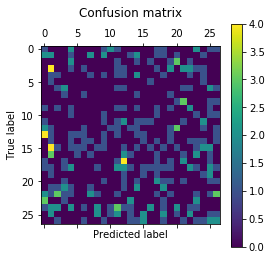

In [ ]:
x_train = np.loadtxt('train_features.csv', delimiter=',')[:,1:];
x_test = np.loadtxt('test_features.csv', delimiter=',')[:,1:];
y_train = np.loadtxt('train_labels.csv', dtype=np.uint8, delimiter=',', skiprows=1)[:,-1];

x_train = x_train.reshape((-1, 30,30,3), order='F')
x_test = x_test.reshape((-1, 30,30,3), order='F')
x_train /= 255
x_test /= 255

x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_train, y_train, 
                                                                    test_size=0.20)

y_new_train = keras.utils.to_categorical(y_new_train.reshape(-1, 1))
y_new_test = keras.utils.to_categorical(y_new_test.reshape(-1, 1))

matrix = confusion_matrix(y_new_test.argmax(1), predict)
print(matrix)

plt.matshow(matrix)
plt.title('Confusion matrix', pad=20)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label',labelpad =5)
plt.show()